In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.inspection import permutation_importance
import pickle

import warnings

warnings.filterwarnings('ignore')

RAND = 16

# Feature Analysis

In [2]:
with open('data.pkl', 'rb') as file:
    X_train, X_test, y_train, y_test = pickle.load(file)

with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

In [3]:
r = permutation_importance(model,
                           X_test,
                           y_test,
                           n_repeats=100,
                           random_state=RAND)

In [4]:
feature_imp = pd.DataFrame()
feature_imp['column'] = X_test.columns
feature_imp['value'] = r['importances_mean']
feature_imp['2_std'] = 2 * r['importances_std']

feature_imp.sort_values(by='value', inplace=True, ascending=False)

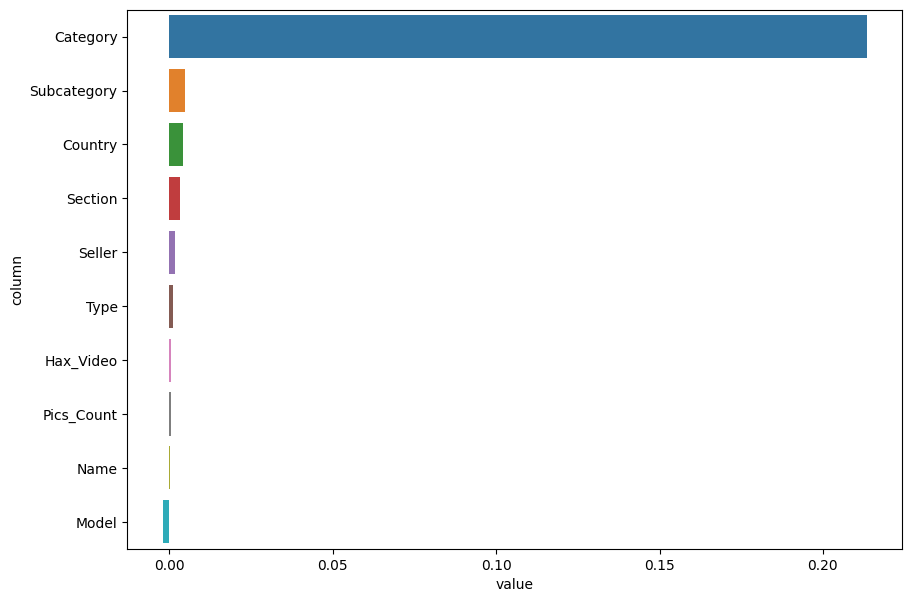

In [5]:
plt.figure(figsize=(10, 7))
sns.barplot(data=feature_imp[:10], x='value', y='column')
plt.show()

# Conclusions and recomendation

##### Для того чтобы зарабатывать от 500 тыс.руб в месяц на маркетплейсе wildberries необходимо:
1. Продавать товары в разделах - женщинам, спорт, красота и товары для дома;
2. Продавать товары из России, но быть аккуратным, так как селлеры с маленькой прибылью, так же в большинстве продают Российские товары;
3. Желательно работать с ООО, но для начала можно начать с ИП;
4. Обязательно в карточке товара иметь от 12 фотографий;
5. Обязательно так же в карточке товара иметь видео.
6. Постараться набрать как можно больше отзывов, желательно ближе к 5 тысячам штук;
7. Следить за рейтингом карточки, чтобы практический не было оценок от 0-я до 3-х баллов, а оценок в 5 баллов было ближе к 90%.

##### При чем наиболее влиятельным признаком модели для большого заработка является:
- Категория товара.

##### В меньшей степени, но так же важны:
- Подкатегория;
- Страна производства;
- Раздел.

<u>__На данные признаки стоит уделить особое внимание.__<u>